Ploting the data from C:/Users/User/Desktop/NMR/500/AS-6-50B-500/1/pdata/1
x data index per ppm is  -1245.9324450414606
data between (2.81, 2.7) is going to be coloured as lightcoral
data between (3.17, 3.1) is going to be coloured as lightsteelblue
data between (3.96, 3.7) is going to be coloured as darkorange
data between (3.06, 2.97) is going to be coloured as pink
Ploting the data from C:/Users/User/Desktop/NMR/500/AS-6-50B-500/2/pdata/1
x data index per ppm is  -1245.9324450414606
data between (2.39, 2.19) is going to be coloured as lightcoral
data between (2.78, 2.65) is going to be coloured as lightsteelblue
extrapolating LEFT
data between (3.97, 3.8) is going to be coloured as darkorange
extrapolating LEFT
data between (2.81, 2.65) is going to be coloured as pink
Ploting the data from C:/Users/User/Desktop/NMR/500/AS-6-50B-500/3/pdata/1
x data index per ppm is  -1245.9324450414606
data between (1.85, 1.77) is going to be coloured as lightcoral
extrapolating LEFT
extrapolating R

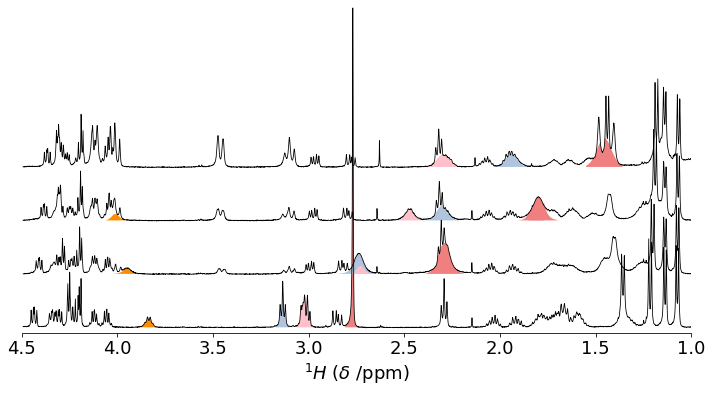

In [17]:
#! /usr/bin/env python

import nmrglue as ng
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib.gridspec import GridSpec
from scipy import linspace

# MAKE SURE THAT THE NUMBER OF FILENAMES, COLOUR, LIMITS, OFFSETS AND SCALE ARE SAME
# WARNING - CHECK THE AXIS LIMITS OF THE PLOTS (SPECIALLY PROJECTIONS) INDIVIDUALLY...
# ...IF PLOTTING PHASE SENSITIVE DATA THE AXIS NEEDS TO BE REVERSED

def extrap(r, A, lm):
    dummy_x=linspace(0, 1, r)
    return A*np.exp(lm*dummy_x)

def peak_shape(r, a, b, c, kind):
    dummy_x=linspace(0, 1, r)
    if kind=='gau':    
        B=(dummy_x-b)**2
        C=c**2
        return a*np.exp(-B/2*C)
    if kind=='lor':
        B=(dummy_x-b)/c
        return a/(1+(B**2))
        

# File names - collect filenames 
fname=["C:/Users/User/Desktop/NMR/500/AS-6-50B-500/1/pdata/1", 
       "C:/Users/User/Desktop/NMR/500/AS-6-50B-500/2/pdata/1",
       "C:/Users/User/Desktop/NMR/500/AS-6-50B-500/3/pdata/1", 
       "C:/Users/User/Desktop/NMR/500/AS-6-50B-500/4/pdata/1"]

# Plot colours
colors_list = ['black','black','black','black'] 

# Plot limits 
# NOTE- goes higher to lower because origin on NMR axis is reversed
limit_x = [4.5,1.0]

# Plot offsets - if uncertain, turn axis for each plot 'on' and check the axis ticks
# The array has to have the same number of elements as the files in 'fname'
offset_y = [0,5e11,1e12,1.5e12]

# Plot scale up (1 for default scale) - gets multiplies with the 1D data to increase scale
# Has to be the same number as the files in 'fname'
scale_y = [30,30,30,30]

# Range of x-scale (ppm) and colour each sub array is for one file... the middle two are values in the tuple are used
# find the x,y coordinate to paint.
range_xppm = [[(2.81,2.70),(3.17,3.10), (3.96,3.70), (3.06,2.97)],
              [(2.39,2.19),(2.78,2.65), (3.97,3.80), (2.81,2.65)],
              [(1.85,1.77),(2.42,2.18), (4.06,3.96), (2.54,2.40)],
              [(1.55,1.36),(2.03,1.85), (0.00,0.00), (2.40,2.19)]]

range_color =[['lightcoral', 'lightsteelblue', 'darkorange', 'pink'],
              ['lightcoral', 'lightsteelblue', 'darkorange', 'pink'],
              ['lightcoral', 'lightsteelblue', 'darkorange', 'pink'],
              ['lightcoral', 'lightsteelblue', 'darkorange', 'pink']]

# This is to insert a dummy peak. (to show peaks overlapping or tailing off). 
# Keep it zero if not needed. (like [0,0,0,0] 
# Goto if c_y!=0 to see how it is used. 
# There are 3 ways to add peak: either extrapolate ('ex') or insert a gaussian ('gau') or lorentzian ('lor') peak
# ('gau' ,6,.25) insert a gaussina peak where 6 detemines width and 0.25 determines height
# ('lor' ,0.16,.25) insert a gaussina peak where 0.16 detemines width and 0.25 determines height
# ('ex',(2.88,3.3),0) extrapolates to LEFT using an exponential function. 2.88 determines the point of 
# extrapolation and 3.3 determines the slope
# ('ex',0,(2.30,3.5)) extrapolates to RIGHT using an exponential function. 2.88 determines the point of 
# extrapolation and 3.3 determines the slope
# ('ex',(2.13,3.6),(1.95,3.6)) extrapolates to BOTH sides RIGHT using exponential function, where: 
# 2.13 determines the point of extrapolation and 3.6 determines the slope on LEFT side
# 1.95 determines the point of extrapolation and 3.6 determines the slope on LEFT side
dum_y = [[0, 0, 0, 0],
         [('gau' ,6 ,0.58), ('ex',(2.85,3.3),0), ('ex',(4.02,3.3),0), ('gau' ,8,.15)],
         [('ex',(1.90,3.6),(1.70,3.6)), ('gau' ,8,.14), ('gau' ,5,.06), 0],
         [('gau' ,5.0 ,0.18), ('gau' ,6,.08), 0, ('gau' ,6,.08)]]

# Label for x and y axis
label_x = '$^1H$'+' '+'$(\delta$'+' '+'/ppm)'
#label_x = '$^{13}C$'+' '+'$(\delta$'+' '+'/ppm)'

# Create the figure subplots
fig = plt.figure(figsize=(12,6),constrained_layout=False)
# Use gridspace if creating multiple subplots
gs = GridSpec(3, 3, figure=fig, wspace=0.002, hspace=0.05)
ax1 = fig.add_subplot(gs[:,:])

# Plot data  
for f,c,offset,scale,col_x,ex_y,col_col in zip(fname, colors_list, offset_y, scale_y, range_xppm, dum_y, range_color):
    # Grab data
    dic, data = ng.bruker.read_pdata(f)
    print("Ploting the data from "+f)
       
    # Make universal dictionary to grab axis data
    udic = ng.bruker.guess_udic(dic, data)
    uc0 = ng.fileiobase.uc_from_udic(udic)
    
    x=uc0.ppm_scale()
    y=(data*scale)+offset
    
    length=len(x)
    span=x[-1]-x[0]
    index_per_ppm=length/span
    print("x data index per ppm is ", index_per_ppm)
        
    # Plot data
    ax1.plot(x,y, c, linewidth =0.8)
    
    #colour the data
    for c_x, c_y, c_c in zip(col_x,ex_y,col_col):
        
        #calculate the indices to be colored
        # '-x[-1]' is correct the index if spectra doesnt start at 0
        
        x0=int((c_x[0]-x[-1])*index_per_ppm)
        x1=int((c_x[1]-x[-1])*index_per_ppm)
               
        print("data between", c_x, "is going to be coloured as", c_c)
        if c_y==0:    
            ax1.fill_between(x[x0:x1], offset, y[x0:x1], facecolor=c_c)
        
        elif c_y!=0:
            # this is to plot a dummy peak incase of ovelapping peaks
            if c_y[0]=='gau' or c_y[0]=='lor':
                dummy_len=len(x[x0:x1])
                dummy_y=offset+peak_shape(dummy_len, c_y[2]*offset, 0.5, c_y[1], c_y[0])
                #ax1.plot(x[x0:x1],dummy_y, c_c, linewidth =0.3)
                
                # this is to that the coloured part doesnt go beyond the plot itself
                intersec_y=[min(a1,a2) for a1,a2 in zip(dummy_y, y[x0:x1])]
                ax1.fill_between(x[x0:x1], offset, intersec_y, facecolor=c_c)
                                
            elif c_y[0]=='ex':
                if c_y[1]!=0:
                # this is to extrapolate on the left side:
                    ax1.fill_between(x[x0:x1], offset, y[x0:x1], facecolor=c_c)
                    
                    print("extrapolating LEFT")
                    temp_x=int((c_y[1][0]-x[-1])*index_per_ppm)
                    dummy_len=len(x[temp_x:x0+2])
                    dummy_y=offset+extrap(dummy_len, data[x0+2],c_y[1][1])
                    #ax1.plot(x[temp_x:x0],dummy_y, c_c, linewidth =1)
                    
                    # this is to that the coloured part doesnt go beyond the plot itself
                    intersec_y=[min(a1,a2) for a1,a2 in zip(dummy_y, y[x0:x1])]
                    ax1.fill_between(x[temp_x:x0+2], offset, intersec_y, facecolor=c_c)
                
                if c_y[2]!=0:
                # this is to extrapolate on the left side:
                    ax1.fill_between(x[x0:x1], offset, y[x0:x1], facecolor=c_c)
                    
                    print("extrapolating RIGHT")
                    temp_x=int((c_y[2][0]-x[-1])*index_per_ppm)
                    dummy_len=len(x[x1-2:temp_x])
                    dummy_y=offset+extrap(dummy_len, data[x1-2],c_y[2][1])
                    #ax1.plot(x[x1-2:temp_x], dummy_y[::-1], 'green', linewidth =1)
                    
                    # this is to that the coloured part doesnt go beyond the plot itself
                    intersec_y=[min(a1,a2) for a1,a2 in zip(dummy_y, y[x0:x1])]
                    ax1.fill_between(x[x1-2:temp_x], offset, intersec_y[::-1], facecolor=c_c)

# Zoom in the region of interest 
#ax1.axis('off')
ax1.set_xlim(limit_x[0],limit_x[1])
ax1.set_ylim(-5e10,3e12)

# Decorate the axis
ax1.set_xlabel(label_x, fontsize=18) # Label the x-axis
ax1.tick_params(axis='x', which='major', labelsize=18)

#ax1.set_ylabel(label_y) # Label the y-axis
#ax1.tick_params(axis='y', which='major', labelsize=8)

#ax1.set_xticks([34,31,28])
#ax1.set_xticklabels([34,31,28],fontsize=6)

ax1.axes.get_yaxis().set_visible(False) # Remove y-axis
#ax1.axes.get_xaxis().set_visible(False) # Remove x-axis

#ax1.tick_params(labelleft=False, labelright=True, left=False, right=True) # This shifts the x-axis or y-axis ticks from left side to right side or vice versa
#ax1.yaxis.set_label_position("right") # This shifts the y-axis label to right, can use the same for x-axis

# Remove spines or the box around the plot (but leave the x-axis line)
ax1.spines['top'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.spines['right'].set_color('white')

plt.show()

fig.savefig('titration Kme2-colour', dpi=120, bbox_inches='tight', pad_inches=0)
